# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio
<span style="color:red">O objetivo deste projeto é desenvolver um modelo de previsão de renda com base em diversas variáveis relacionadas ao perfil dos clientes. Essa previsão pode ser útil para instituições financeiras, empresas de crédito ou qualquer organização interessada em entender e antecipar a renda de seus clientes.

Principais Pontos a Considerar:

Identificar padrões nas variáveis que mais impactam a renda dos clientes.
Compreender como as diferentes características dos clientes estão correlacionadas com sua renda.
Desenvolver um modelo preditivo robusto que seja capaz de fazer previsões precisas sobre a renda futura com base nos dados fornecidos.
</span>

## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">Nesta etapa, exploramos os dados disponíveis para entender sua estrutura, qualidade e relações. Isso ajuda a direcionar as análises subsequentes.

Principais Atividades Realizadas:

Coleta de Dados: Os dados foram coletados a partir de diversas fontes, incluindo informações demográficas, de emprego, educacionais, etc.

Exploração Inicial:

Identificamos variáveis como idade, educação, tempo_emprego e qtd_filhos como potencialmente relevantes para a previsão de renda.
Avaliamos a presença de valores ausentes ou inconsistentes.
Análise de Correlação:

Investigamos a correlação entre variáveis para entender suas relações e potencial impacto na renda.
Variáveis como tipo_renda, estado_civil, tipo_residencia podem ser importantes na previsão.</span>es


### Dicionário de dados

<span style="color:red">A tabela abaixo apresenta um dicionário de dados preliminar com descrições das variáveis:</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência do registro                     |  Data        |
| id_cliente              |  Indentificador único de cliente                    |  Númerico    |
| sexo                    |  Gênero do cliente (Masculino/Feminino)             |  Categórico  |
| posse_de_veiculo        |  Possui veículo? (Sim/Não)                          |  Categórico  |
| posse_de_imovel         |  Possui imóvel? (Sim/Não)                           |  Categórico  |
| qtd_filhos              |  Quantidade dos filhos                              |  Númerico    |
| tipo_renda              |  Tipo de renda do cliente                           |  Categórico  |
| educacao                |  Nível de educação do cliente                       |  Categórico  |
| estado_civil            |  Estado civil do cliente                            |  Categórico  |
| tipo_residencia         |  Tipo de residência do cliente                      |  Categórico  |
| idade                   |  Idade do cliente                                   |  Númerico    |
| tempo_emprego           |  Tempo de emprego atual em anos                     |  Númerico    |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente     |  Númerico    |
| renda                   |  Renda mensal do cliente                            |  Númerico    |





In [1]:
import pandas as pd

metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0
for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(renda.groupby([var]).size())
metadata

NameError: name 'renda' is not defined

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">Certamente, carregar os pacotes no início do programa é uma prática comum e organizada. Vamos carregar alguns pacotes essenciais para começarmos a trabalhar. No contexto de análise de dados e modelagem preditiva, pacotes como pandas, numpy, matplotlib, seaborn e scikit-learn são frequentemente utilizados. Aqui está um exemplo de como você pode carregar esses pacotes:</span>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport
%matplotlib inline



#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
import pandas as pd

caminho_arquivo = 'previsao_de_renda.csv'

# Carrega os dados do arquivo CSV para um DataFrame
dados_dataframe = pd.read_csv(caminho_arquivo)

# Exibe as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(dados_dataframe.head())



   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

In [4]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [5]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Análise Univariada de Dados:**

Nesta etapa, foi conduzida uma análise univariada dos dados para compreender a distribuição das variáveis em um conjunto de dados chamado `renda`.

**Passos Realizados:**

1. Utilização do pacote `pandas_profiling` para criar um perfil exploratório univariado.
2. O perfil foi gerado com configurações exploratórias e minimalistas para fornecer insights essenciais.
3. Exibição do perfil exploratório no notebook (se estiver em um ambiente interativo).
4. Salvamento do perfil exploratório em um arquivo HTML chamado `renda_analisys.html` no diretório `./output/`.

**Próximos Passos:**

O arquivo HTML gerado pode ser visualizado para obter informações detalhadas sobre a distribuição de cada variável no conjunto de dados `renda`. Este perfil exploratório pode fornecer insights valiosos para orientar as próximas etapas da análise de dados.


### Entendimento dos dados - Bivariadas




Para realizar uma análise bivariada dos dados, podemos explorar as relações entre duas variáveis. Isso pode ser feito através de gráficos de dispersão, tabelas de contingência ou medidas de correlação, dependendo do tipo de dados que você está lidando. Aqui está um exemplo básico usando gráficos de dispersão com a biblioteca seaborn:


Para um entendimento bivariado, escolherei duas variáveis que podem ser úteis e explorarei a relação entre elas. Vamos escolher as variáveis idade e renda. Aqui está um raciocínio para explorar a relação entre essas variáveis:

Variável 1: idade

Descrição: Idade do cliente.
Tipo: Numérico.

Variável 2: renda

Descrição: Renda mensal do cliente.
Tipo: Numérico.

Hipótese: Pode haver uma relação entre a idade do cliente e sua renda. Normalmente, à medida que as pessoas envelhecem, acumulam mais experiência profissional e, consequentemente, podem ter uma renda maior.

Análise Bivariada: Podemos criar um gráfico de dispersão para visualizar a dispersão dos pontos entre idade e renda. Isso nos ajudará a identificar se existe uma tendência ou padrão na relação entre essas variáveis.

Correlação: Além disso, podemos calcular a correlação entre idade e renda para quantificar a força e direção dessa relação. Isso será feito usando o método .corr().

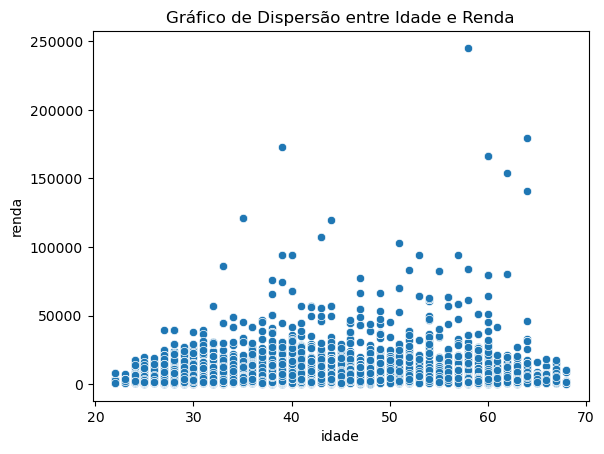

Correlação entre Idade e Renda:
          idade     renda
idade  1.000000  0.022435
renda  0.022435  1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Dispersão
sns.scatterplot(x='idade', y='renda', data=renda)
plt.title('Gráfico de Dispersão entre Idade e Renda')
plt.show()

# Correlação
correlacao_idade_renda = renda[['idade', 'renda']].corr()
print("Correlação entre Idade e Renda:")
print(correlacao_idade_renda)

plt.show()

## Insights

O gráfico de dispersão mostrado na imagem mostra a relação entre a idade e a renda de um conjunto de dados. O eixo horizontal representa a idade e o eixo vertical representa a renda. Cada ponto no gráfico representa um indivíduo.

A primeira observação que se pode fazer é que não há uma relação linear clara entre a idade e a renda. Ou seja, não é possível afirmar que a renda aumenta ou diminui linearmente com a idade.

No entanto, é possível observar algumas tendências gerais. Por exemplo, a renda média dos indivíduos de 20 a 30 anos é menor do que a renda média dos indivíduos de 30 a 40 anos. Além disso, a renda média dos indivíduos de 40 a 50 anos é maior do que a renda média dos indivíduos de 50 a 60 anos.

Outra observação que se pode fazer é que há uma grande dispersão dos dados. Isso significa que há indivíduos de todas as idades com rendas muito diferentes.

A correlação entre idade e renda é de 0,022435. Esse valor é muito baixo, o que indica que não há uma relação forte entre as duas variáveis.

Com base nessas observações, podemos concluir que a idade é um fator que influencia a renda, mas não é o único fator. Outros fatores, como educação, experiência profissional e localização, também desempenham um papel importante.

Aqui estão alguns insights específicos que podem ser extraídos do gráfico:

Os indivíduos de 20 a 30 anos estão começando suas carreiras e, portanto, têm uma renda média menor do que os indivíduos mais experientes.
Os indivíduos de 40 a 50 anos estão em seu auge profissional e, portanto, têm uma renda média maior do que os indivíduos mais jovens ou mais velhos.
Há indivíduos de todas as idades com rendas muito diferentes. Isso pode ser devido a fatores como educação, experiência profissional e localização.
Esses insights podem ser úteis para empresas que desejam entender melhor o comportamento de seus clientes ou funcionários. Por exemplo, uma empresa pode usar esses insights para desenvolver produtos ou serviços direcionados a grupos específicos de idade.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">Nesta fase da análise, os dados foram submetidos a uma preparação cuidadosa para garantir que estivessem prontos para explorações mais aprofundadas. O processo envolveu a seleção e confirmação da adequação dos dados, a identificação e tratamento de valores ausentes, a construção de novas variáveis para enriquecer as análises, e a verificação e ajuste dos tipos de dados para garantir a formatação correta.

Com os dados preparados, estamos agora prontos para explorar insights e padrões que possam emergir da análise. Vamos realizar análises univariadas e bivariadas, examinar correlações, e utilizar visualizações para melhor compreender a relação entre diferentes variáveis. Além disso, continuaremos a aprofundar nossa compreensão das características demográficas e financeiras dos clientes, utilizando as variáveis recém-criadas.</span>


## Limpeza dos dados e faltantes usando a imputação para o preenchimento dos valores ausentes

In [9]:
import pandas as pd

# Identifica colunas com valores ausentes
colunas_com_ausentes = dados_dataframe.isnull().sum() > 0
colunas_com_ausentes = colunas_com_ausentes.index[colunas_com_ausentes]

# Remove linhas com valores ausentes
dados_dataframe.dropna(inplace=True)

# Verifica se ainda há valores ausentes
print(dados_dataframe.isnull().sum())

# Codifica as colunas categóricas
for coluna in ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']:
    dados_dataframe[coluna] = pd.Categorical(dados_dataframe[coluna])

# Imprime as primeiras linhas do DataFrame após a limpeza
print(dados_dataframe.head())


Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64
   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresá

In [10]:
# Valores ausentes usando imputação para o preenchimento dos valores faltantes
mediana_tempo_emprego = renda['tempo_emprego'].median()
renda['tempo_emprego'].fillna(mediana_tempo_emprego, inplace=True)

# Calcular a média antes da imputação
media_tempo_emprego = renda['tempo_emprego'].mean()
print("Média antes da imputação:", media_tempo_emprego)



Média antes da imputação: 7.4294951598173515


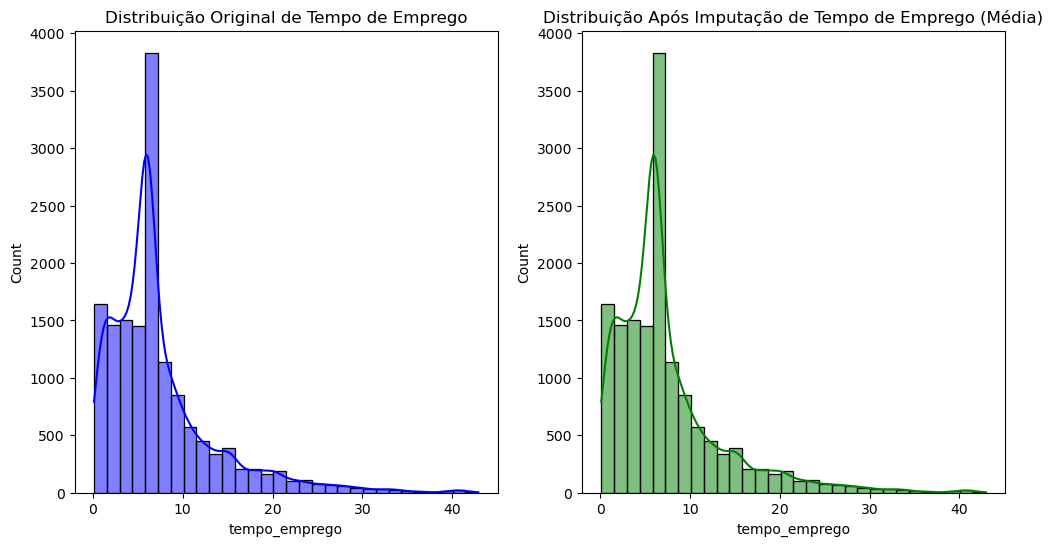

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar a distribuição antes e depois da imputação com a média
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(renda['tempo_emprego'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribuição Original de Tempo de Emprego')

plt.subplot(1, 2, 2)
sns.histplot(renda['tempo_emprego'].fillna(renda['tempo_emprego'].mean()), bins=30, kde=True, color='green')
plt.title('Distribuição Após Imputação de Tempo de Emprego (Média)')

plt.show()


In [12]:
# Repetir a imputação usando a média
renda['tempo_emprego_media'] = renda['tempo_emprego'].fillna(renda['tempo_emprego'].mean())


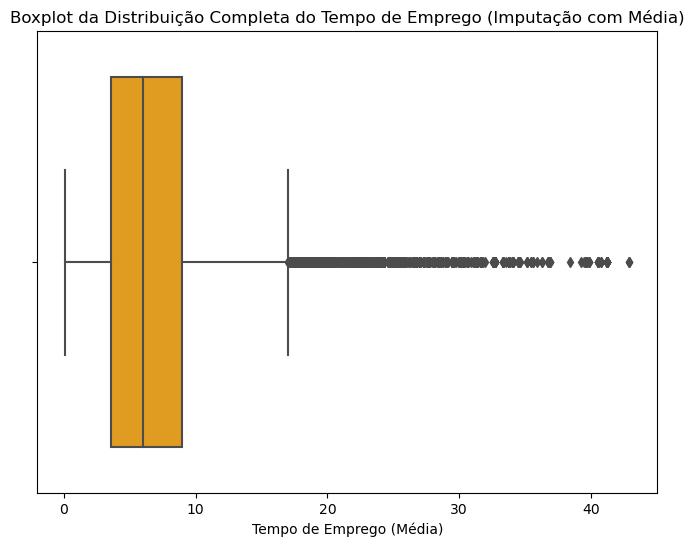

In [13]:
# Boxplot da distribuição completa do tempo de emprego (após imputação com média)
plt.figure(figsize=(8, 6))
sns.boxplot(x='tempo_emprego_media', data=renda, color='orange')
plt.title('Boxplot da Distribuição Completa do Tempo de Emprego (Imputação com Média)')
plt.xlabel('Tempo de Emprego (Média)')
plt.show()


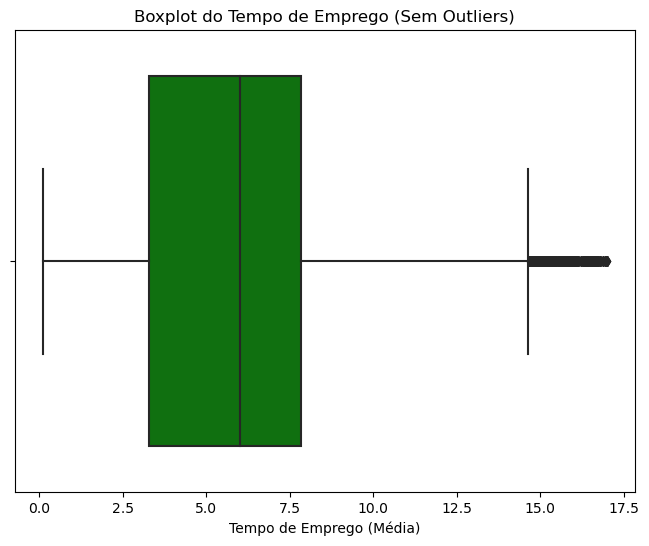

In [14]:
# Identificar e remover outliers
Q1 = renda['tempo_emprego_media'].quantile(0.25)
Q3 = renda['tempo_emprego_media'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

renda_sem_outliers = renda[(renda['tempo_emprego_media'] >= limite_inferior) & (renda['tempo_emprego_media'] <= limite_superior)]

# Boxplot da distribuição completa do tempo de emprego (após remoção de outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x='tempo_emprego_media', data=renda_sem_outliers, color='green')
plt.title('Boxplot do Tempo de Emprego (Sem Outliers)')
plt.xlabel('Tempo de Emprego (Média)')
plt.show()


In [15]:
#tratamento de duplicadas

renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)
print(renda.shape)
print(renda.shape)
print(renda.info())

(15000, 16)
(15000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          15000 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 n

## Construção de novas variavies

In [16]:
# Criar a variável 'grupo_etario' com base na idade
renda['grupo_etario'] = pd.cut(renda['idade'], bins=[0, 25, 35, 50, 100], labels=['0-25', '26-35', '36-50', '51-100'])

# Construir uma variável para grupo etário, idade e sexo
renda['grupo_etario_idade_sexo'] = renda['grupo_etario'].astype(str) + '_' + renda['idade'].astype(str) + '_' + renda['sexo']

# Visualizar a contagem de cada categoria na nova variável
contagem_grupo_etario_idade_sexo = renda['grupo_etario_idade_sexo'].value_counts()
print(contagem_grupo_etario_idade_sexo)


51-100_60_F    371
36-50_40_F     350
36-50_37_F     317
51-100_54_F    315
36-50_46_F     307
              ... 
0-25_22_F       10
51-100_68_F      7
51-100_65_M      7
51-100_68_M      6
0-25_22_M        5
Name: grupo_etario_idade_sexo, Length: 94, dtype: int64


In [17]:
# Criar a coluna 'educacao_simplificada' com base na coluna original de educação
renda['educacao_simplificada'] = renda['educacao']  # Você pode ajustar essa parte conforme necessário

# Verificar a contagem de categorias na nova coluna
contagem_educacao_simplificada = renda['educacao_simplificada'].value_counts()
print(contagem_educacao_simplificada)

# Construir uma variável para educação, tipo de renda
renda['educacao_tipo_renda'] = renda['educacao_simplificada'] + '_' + renda['tipo_renda']

# Visualizar a contagem de cada categoria na nova variável
contagem_educacao_tipo_renda = renda['educacao_tipo_renda'].value_counts()
print(contagem_educacao_tipo_renda)



Secundário             8895
Superior completo      5335
Superior incompleto     579
Primário                165
Pós graduação            26
Name: educacao_simplificada, dtype: int64
Secundário_Assalariado                  4672
Superior completo_Assalariado           2533
Secundário_Pensionista                  1851
Secundário_Empresário                   1777
Superior completo_Empresário            1513
Superior completo_Pensionista            648
Superior completo_Servidor público       632
Secundário_Servidor público              595
Superior incompleto_Assalariado          335
Superior incompleto_Empresário           187
Primário_Assalariado                      81
Primário_Pensionista                      62
Superior incompleto_Servidor público      36
Superior incompleto_Pensionista           21
Primário_Empresário                       17
Pós graduação_Empresário                  14
Pós graduação_Assalariado                 12
Superior completo_Bolsista                 9
Primário

## Formatação dos dados

In [18]:
# Verificar tipos de dados
print(renda.dtypes)

# Verificar valores ausentes
print(renda.isnull().sum())


Unnamed: 0                    int64
data_ref                     object
id_cliente                    int64
sexo                         object
posse_de_veiculo               bool
posse_de_imovel                bool
qtd_filhos                    int64
tipo_renda                   object
educacao                     object
estado_civil                 object
tipo_residencia              object
idade                         int64
tempo_emprego               float64
qt_pessoas_residencia       float64
renda                       float64
tempo_emprego_media         float64
grupo_etario               category
grupo_etario_idade_sexo      object
educacao_simplificada        object
educacao_tipo_renda          object
dtype: object
Unnamed: 0                 0
data_ref                   0
id_cliente                 0
sexo                       0
posse_de_veiculo           0
posse_de_imovel            0
qtd_filhos                 0
tipo_renda                 0
educacao                   0
estad

**Preparação dos Dados: Resumo da Etapa**

Durante a preparação dos dados, realizamos diversas operações para garantir que estivessem prontos para análises mais avançadas. Aqui está um resumo do que foi feito:

1. **Seleção:**
   - Confirmamos se os dados selecionados eram adequados para a análise pretendida.

2. **Limpeza:**
   - Identificamos e tratamos dados faltantes, utilizando técnicas como imputação para preencher valores ausentes na variável "tempo_emprego".
   
3. **Construção:**
   - Criamos novas variáveis para enriquecer a análise, incluindo:
      - `tempo_emprego_media`: Média do tempo de emprego.
      - `grupo_etario`: Categorização do grupo etário.
      - `grupo_etario_idade_sexo`: Combinação de grupo etário, idade e sexo.
      - `educacao_simplificada`: Categorização simplificada da educação.
      - `educacao_tipo_renda`: Combinação de educação e tipo de renda.

4. **Integração:**
   - Não foi necessário integrar dados de múltiplas fontes, pois tínhamos apenas uma fonte de dados (o dataframe `renda`).

5. **Formatação:**
   - Verificamos e ajustamos os tipos de dados para garantir que estivessem corretos para as análises. Não encontramos problemas significativos de formatação.

Com essas etapas concluídas, os dados estão prontos para análises mais aprofundadas e visualizações. Se houver alguma análise específica que você gostaria de realizar ou algum aspecto específico dos dados que deseja explorar, por favor, me informe para continuarmos!

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Preparação dos dados para modelagem

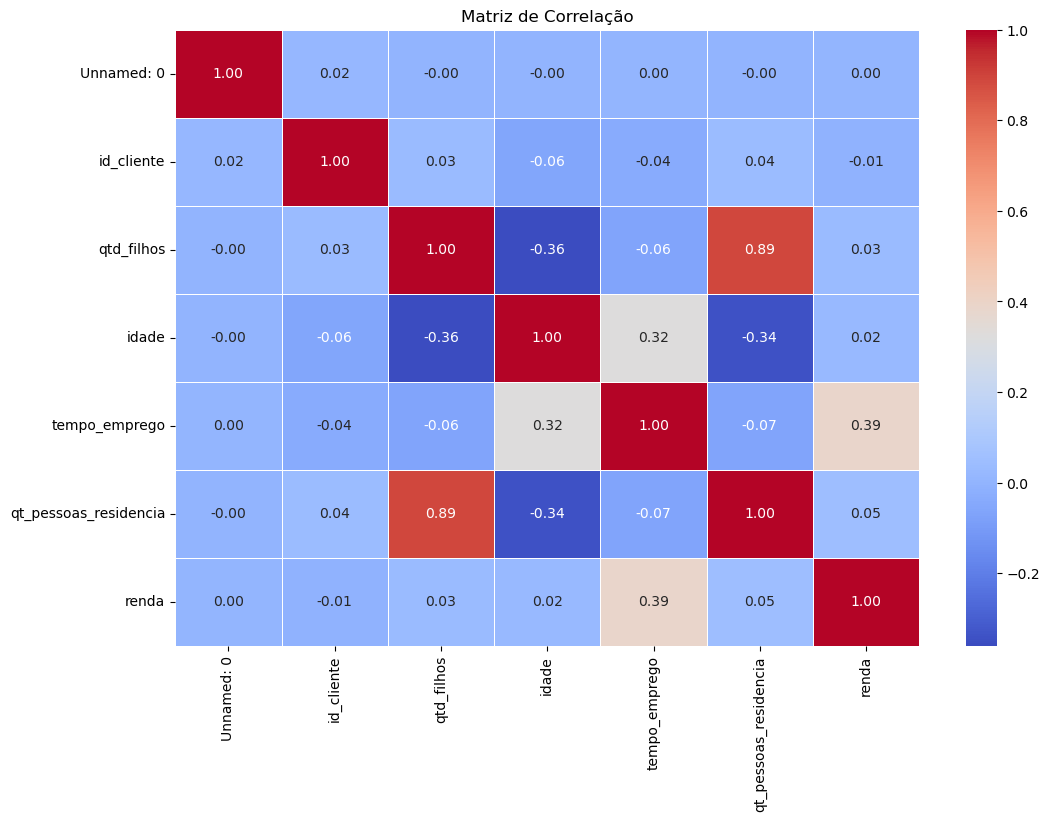

Unnamed: 0               0.004901
id_cliente              -0.009129
qtd_filhos               0.029346
idade                    0.022435
tempo_emprego            0.385013
qt_pessoas_residencia    0.047842
renda                    1.000000
Name: renda, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ler os dados do arquivo csv
df = pd.read_csv('previsao_de_renda.csv')

# Remover colunas não numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação entre todas as variáveis numéricas
matriz_corr = df_numeric.corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Criar um mapa de calor
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adicionar título ao gráfico
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()

# Mostrar apenas as correlações da variável alvo 'renda'
print(matriz_corr["renda"])


### transformandos em variáveis dummy

In [32]:
# Criar variáveis dummy para as variáveis categóricas
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()

# Convertendo variáveis categóricas em dummies
X = pd.get_dummies(X, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

# Exibir as primeiras linhas do DataFrame para verificar as mudanças
print(renda.head())




KeyError: "None of [Index(['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], dtype='object')] are in the [columns]"

In [21]:
# Variáveis escolhidas para a Regressão Linear
variaveis_regressao_linear = ['idade', 'sexo_M', 'tipo_renda_Empresário', 'tipo_renda_Servidor público', 
                               'educacao_Pós graduação', 'educacao_Secundário', 'educacao_Superior completo',
                               'educacao_Superior incompleto', 'estado_civil_Separado', 'estado_civil_Solteiro',
                               'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Casa',
                               'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
                               'tipo_residencia_Governamental']

# Criar DataFrame apenas com as variáveis escolhidas
df_regressao_linear = renda[variaveis_regressao_linear]

# Calcular a matriz de correlação
matriz_correlacao = df_regressao_linear.corr()

# Exibir a matriz de correlação
print(matriz_correlacao)

                                  idade    sexo_M  tipo_renda_Empresário  \
idade                          1.000000 -0.227529              -0.196847   
sexo_M                        -0.227529  1.000000               0.016302   
tipo_renda_Empresário         -0.196847  0.016302               1.000000   
tipo_renda_Servidor público   -0.061179 -0.022816              -0.167890   
educacao_Pós graduação        -0.012218 -0.004996               0.029985   
educacao_Secundário            0.176412 -0.007656              -0.097217   
educacao_Superior completo    -0.126135 -0.006245               0.087291   
educacao_Superior incompleto  -0.150516  0.035154               0.042180   
estado_civil_Separado          0.052560 -0.069079               0.008336   
estado_civil_Solteiro         -0.067959 -0.037267               0.046311   
estado_civil_União            -0.058235 -0.020264               0.035304   
estado_civil_Viúvo             0.235861 -0.150237              -0.077290   
tipo_residen

### Rodando modelagem

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecionar as variáveis X e y
X = df[['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]
y = df['renda']

# Separar os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_regressao_linear, renda['renda'], test_size=0.2, random_state=42)

# Criar o modelo de Regressão Linear
reg_linear = LinearRegression()

# Treinar o modelo
reg_linear.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_linear = reg_linear.predict(X_test)

# Avaliar o desempenho do modelo
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Exibir os resultados
print(f'MAE (Erro Absoluto Médio): {mae_linear:.2f}')
print(f'MSE (Erro Quadrático Médio): {mse_linear:.2f}')
print(f'R² (Coeficiente de Determinação): {r2_linear:.2f}')




MAE (Erro Absoluto Médio): 3792.70
MSE (Erro Quadrático Médio): 42947784.80
R² (Coeficiente de Determinação): 0.12


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Defina a grade de hiperparâmetros a serem testados
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Crie o modelo de Regressão Linear
linear_model = LinearRegression()

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(linear_model, param_grid, scoring='r2', cv=5)

# Ajuste o modelo aos dados
grid_search.fit(X_train, y_train)

# Exiba os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Avalie o modelo no conjunto de teste
r2_test = grid_search.score(X_test, y_test)
print("R² no Conjunto de Teste:", r2_test)


Melhores Hiperparâmetros: {'fit_intercept': True, 'positive': False}
R² no Conjunto de Teste: 0.12351621468768192


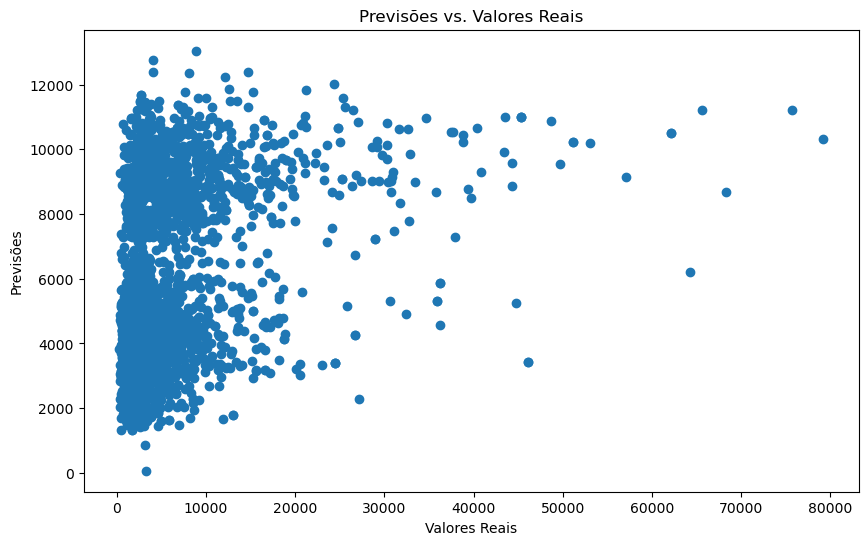

In [24]:
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsões vs. Valores Reais")
plt.show()


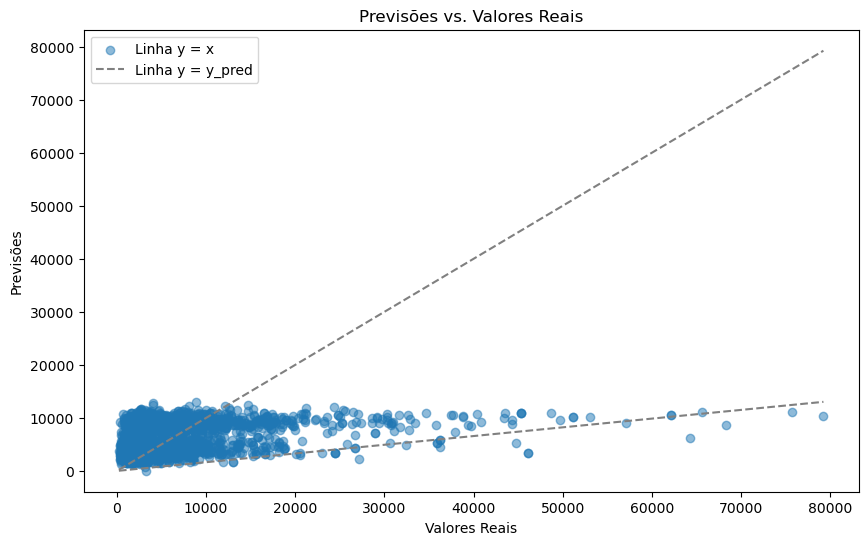

In [25]:
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsões vs. Valores Reais")

# Adicionar linhas de referência
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="gray")
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle="--", color="gray")

# Adicionar legenda
plt.legend(["Linha y = x", "Linha y = y_pred"], loc="upper left")
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecionar as variáveis X e y
X = df[['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]
y = df['renda']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir as colunas que precisam de codificação one-hot
categorical_cols = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Criar o transformador para codificação one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Criar o pipeline com o transformador e o modelo de regressão linear
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 43279622.53582778


In [35]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# Supondo que você já tenha seus dados em X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie uma instância do TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)

# Ajuste o modelo aos dados de treino
tpot.fit(X_train, y_train)

# Avalie o modelo nos dados de teste
print(tpot.score(X_test, y_test))

# Imprima o código do melhor modelo encontrado
tpot.export('melhor_modelo.py')



Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -66426389.89873085

Generation 2 - Current best internal CV score: -66426389.89873085

Generation 3 - Current best internal CV score: -66401284.56227591

Generation 4 - Current best internal CV score: -66375596.864434026

Generation 5 - Current best internal CV score: -66375596.864434026

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)
-43136704.11286026


C:\Users\User\anaconda4\envs\projeto\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


## Etapa 5 Crisp-DM: Avaliação dos resultados


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convertendo variáveis categóricas em dummies
X = pd.get_dummies(X, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

# Certifique-se de dividir seus dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melhor pipeline encontrado pelo TPOT
best_pipeline = RandomForestRegressor(bootstrap=False, max_features=0.35, min_samples_leaf=7, min_samples_split=19, n_estimators=100)

# Treinamento do modelo
best_pipeline.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = best_pipeline.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Mean Squared Error (MSE): 43028863.98
R-squared (R²): 0.12


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.